In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [7]:
# reflect an existing database into a new model
    # Create engine to connect to db
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect the tables
    # Automap Base creates a base class for an automap schema in SQLAlchemy
Base = automap_base()
    # When we reflect tables, we create classes that help keep our code separate. 
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
    # Base.classes gives us access to all the classes.
    # keys() references all the names of the classes.
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
    # Create shortcut variable to measuremtn and station classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

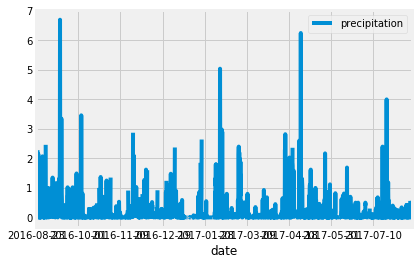

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 


# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
    # all puts results into a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
    # inplace updates the current df. false would create new df.
df.set_index(df['date'], inplace=True)
# print(df)
# print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

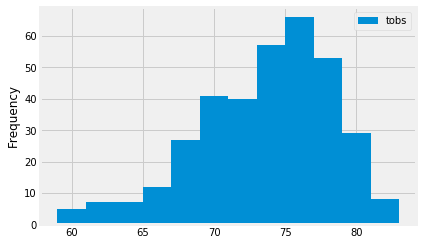

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)

# plt.tight_layout()

In [40]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    return results

calc_temps('2017-06-01','2017-06-30')

[(71.0, 83.0, 77.21989528795811)]

# Challenge

Precipitation  Temperature
count    1492.000000  1622.000000
mean        0.146662    76.412454
std         0.409549     3.453138
min         0.000000    65.000000
25%         0.000000    74.000000
50%         0.010000    76.000000
75%         0.110000    79.000000
max         4.810000    87.000000


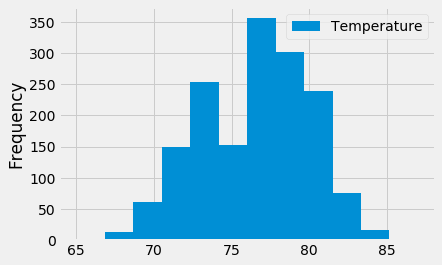

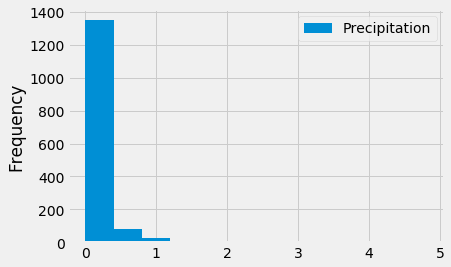

In [80]:
# Identify key statistical data in June across all of the stations and years using the describe() function.

# validation testing
df = pd.DataFrame()

def monthSummary(monthNum):
    results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(extract('month', Measurement.date)==monthNum).all()

    # validation testing
    global df

    # Save the query results as a Pandas DataFrame and set the index to the date column
    df = pd.DataFrame(results, columns=['Date','Precipitation', 'Temperature'])
    
    # inplace updates the current df. false would create new df.
    df.set_index(df['Date'], inplace=True)

    # Sort the dataframe by date
    df = df.sort_index()

    # plot temerature
    temperDf = df[['Temperature']]
    temperDf.plot.hist(bins=12)

    # plot percipitation
    percipDf = df[['Precipitation']]
    percipDf.plot.hist(bins=12)

    # Validation testing
    df.to_csv('monthData.csv')

    # print stat summary of df
    return df.describe()



print(monthSummary(8))

Precipitation  Temperature
count    1405.000000  1517.000000
mean        0.216819    71.041529
std         0.541399     3.745920
min         0.000000    56.000000
25%         0.000000    69.000000
50%         0.030000    71.000000
75%         0.150000    74.000000
max         6.420000    83.000000


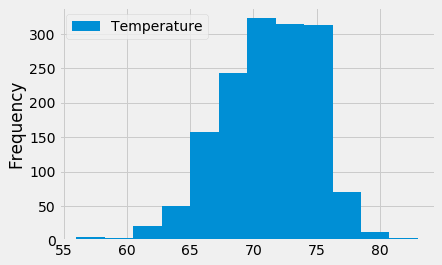

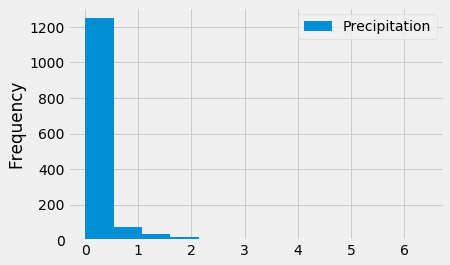

In [65]:
# Identify key statistical data in December across all stations and years using the describe() function.
print(monthSummary(12))